In [1]:
import numpy as np
import json
import torch
import argparse
from utils import *
from models import *

In [2]:
with open('parameters.json') as json_file:
    parameters = json.load(json_file)

In [3]:
low_res_name = parameters['low_res_name']
super_res_name = parameters['super_res_name']
att_path = parameters['att_path']
adj_path = parameters['adj_path']
batch_size = parameters['batch_size']
epochs = parameters['epochs']
learning_rate = parameters['learning_rate']
learning_rate_step = parameters['learning_rate_step']
learning_rate_ratio = parameters['learning_rate_ratio']
attention = parameters['attention']
epoch_check = parameters['epoch_check']
device = "cuda" if torch.cuda.is_available() else "cpu"

In [4]:
att_low_res_path = att_path+low_res_name+'.npy'
adj_low_res_path = adj_path+low_res_name+'.npy'
att_super_res_path = att_path+super_res_name+'.npy'
adj_super_res_path = adj_path+super_res_name+'.npy'

In [5]:
################### load data #################
print('Load Datasets...')
dataset_train, dataset_val, dataset_test = load_data(att_low_res_path, 
                                                     adj_low_res_path, 
                                                     att_super_res_path, 
                                                     adj_super_res_path)

Load Datasets...


In [344]:
learning_rate = 1e-6
learning_rate_step = 5
learning_rate_ratio = 2
batch_size = 32
print('Initialize Model...')
model = GraphSR(dataset_train.adj_super.size(0)).to(device)
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=learning_rate)
criterion = nn.L1Loss().to(device)
scheduler = StepLR(optimizer, learning_rate_step, learning_rate_ratio)

Initialize Model...


In [345]:
loss_tack = []
lr = [learning_rate]

In [346]:
## iterate through training dataset
for i in range(0, len(dataset_train), batch_size):
    
    ## batch data
    indices = range(i, min(len(dataset_train), i+batch_size))        
    X_batch_low, X_batch_super, A_low, A_super = zip(*[dataset_train[i] for i in indices])
    X_batch_low = torch.stack(X_batch_low).to(device)
    X_batch_super = torch.stack(X_batch_super).to(device)
    A_low = A_low[0].to(device)
    A_super = A_super[0].to(device)
    
    ## prediction
    pred = model(X_batch_low, A_low, A_super)
    
    ## loss
    loss = criterion(X_batch_super, pred)
    
    ## back propogration
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    scheduler.step()
    
    loss_tack.append(loss.item())
    lr += scheduler.get_last_lr()

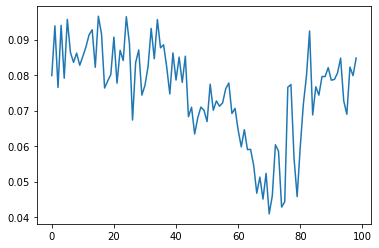

In [347]:
plt.plot(loss_tack)
pass

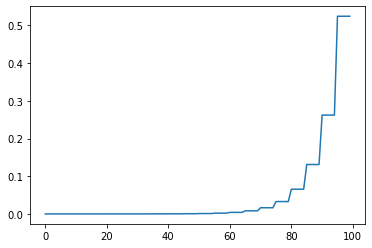

In [348]:
plt.plot(lr)
pass

In [349]:
lr[55:75]

[0.002048,
 0.002048,
 0.002048,
 0.002048,
 0.002048,
 0.004096,
 0.004096,
 0.004096,
 0.004096,
 0.004096,
 0.008192,
 0.008192,
 0.008192,
 0.008192,
 0.008192,
 0.016384,
 0.016384,
 0.016384,
 0.016384,
 0.016384]

In [354]:
3000*100/15000

20.0

In [355]:
1e-2*(0.9**20)

0.0012157665459056935